### Installing the libraries

In [1]:
! pip install --upgrade pip
! pip install matplotlib
! pip install numpy
! pip install datetime
! pip install tensorflow
! pip install sklearn
! pip install pandas

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PRITES~1\\AppData\\Local\\Temp\\pip-uninstall-jdc8a839\\pip.exe'
Consider using the `--user` option or check the permissions.



### Importing all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime

### Model for 1-5 min

In [2]:
data_1 = pd.read_csv('BANKNIFTY/BANKNIFTY-I/'+ str(2012)+'/BANKNIFTY-I.csv')
year = 2013
for i in range(10):
    data_1_1 = pd.read_csv('BANKNIFTY/BANKNIFTY-I/'+ str(year)+'/BANKNIFTY-I.csv')
    data_1 = data_1.append(data_1_1)
    year = year+1


In [3]:
data_1

,Date,Time,open,high,low,close,volume,oi
0,20120102,09:15,7964.00,7980.00,7931.55,7955.95,9850,1804550
1,20120102,09:16,7952.35,7957.95,7930.55,7938.00,8350,1804550
2,20120102,09:17,7938.00,7962.20,7937.00,7960.00,6600,1811250
3,20120102,09:18,7960.00,7967.25,7957.00,7966.00,5225,1811250
4,20120102,09:19,7967.00,7970.00,7962.30,7965.00,5500,1811250
...,...,...,...,...,...,...,...,...
10519,20220210,15:26:00,39015.65,39019.95,39011.95,39014.00,20875,2029175
10520,20220210,15:27:00,39012.60,39017.15,39006.40,39009.30,19925,2022250
10521,20220210,15:28:00,39011.05,39012.55,39004.20,39011.25,32075,2022250
10522,20220210,15:29:00,39015.00,39027.95,39012.05,39020.00,21200,2022250


In [4]:
data_1 = data_1[['Date','Time','close','volume']]

In [5]:
data_1.reset_index(drop=True, inplace=True)
data_1.to_csv('BANKNIFTY/appended/data_1.csv',index=False)

In [6]:
df_1 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_1 = pd.DataFrame(df_1)
df_1.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


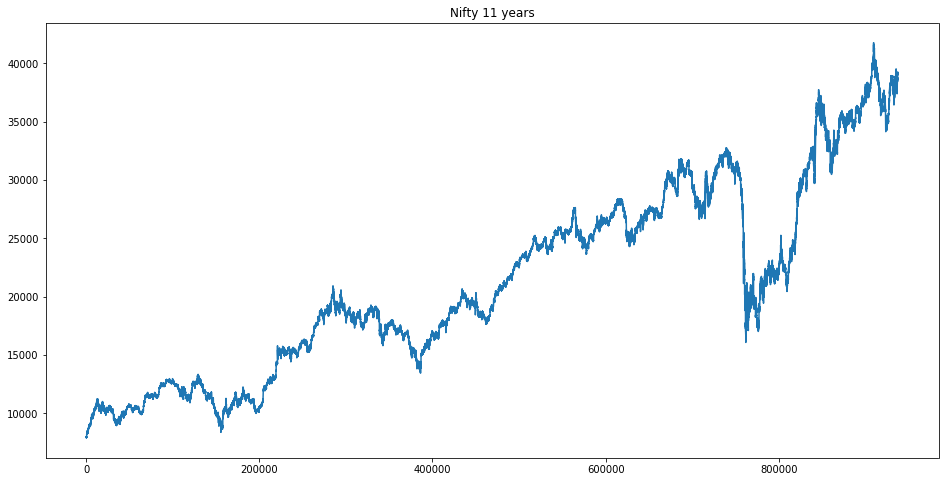

In [7]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_1.close)
plt.show()

In [24]:
training_size= int(0.85*len(df_1))
test_size=len(df_1)-training_size
train_data,test_data=df_1[0:training_size],df_1[training_size:len(df_1)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [25]:
df11 = train_data['close']
df22 = train_data['volume']

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_5min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_5min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+5 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[9+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [51]:
X_train, y_train = to_supervised(dataset_stacked,5,1)
print(X_train.shape), print(y_train.shape)
print(X_train[0:11])
print(y_train)

(797067, 5, 2)
(797067,)
[[[0.00304958 0.01848377]
  [0.00232837 0.01566898]
  [0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]]

 [[0.00232837 0.01566898]
  [0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]]

 [[0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]]

 [[0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]]

 [[0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]]

 [[0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]
  [0.00366833 0.01243198]]

 [[0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]
  [0.00366833 0.01243198]
  [0.00381498 0.01595046]]

 [[0.00360605 0.00844436]
  [0.00357391 0.01792081]

In [52]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.fit(X_train,y_train,epochs=2,batch_size=64,verbose=1)

Epoch 1/2
12455/12455 [==============================] - 98s 8ms/step - loss: 2.8438e-06
Epoch 2/2
12455/12455 [==============================] - 95s 8ms/step - loss: 2.8740e-06


In [54]:
model.save("BANKNIFY_11year_5min_qty_ltp.hdf5")

In [59]:
df33 = test_data['close']
df44 = test_data['volume']

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_1min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_1min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [61]:
X_test, y_test = to_supervised(dataset_stacked_test,5,1)
print(X_test.shape), print(y_test.shape)

(140650, 5, 2)
(140650,)


(None, None)

In [62]:
model = tf.keras.models.load_model("BANKNIFY_11year_5min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22018.01 ],
       [22018.867],
       [22006.506],
       ...,
       [38982.555],
       [38981.293],
       [38971.977]], dtype=float32)

### Model for 1-5 min (giving 15 instance)

In [8]:
data_1.reset_index(drop=True, inplace=True)
data_1.to_csv('BANKNIFTY/appended/data_1.csv',index=False)

In [9]:
df_1_new = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_1_new = pd.DataFrame(df_1_new)
df_1_new.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


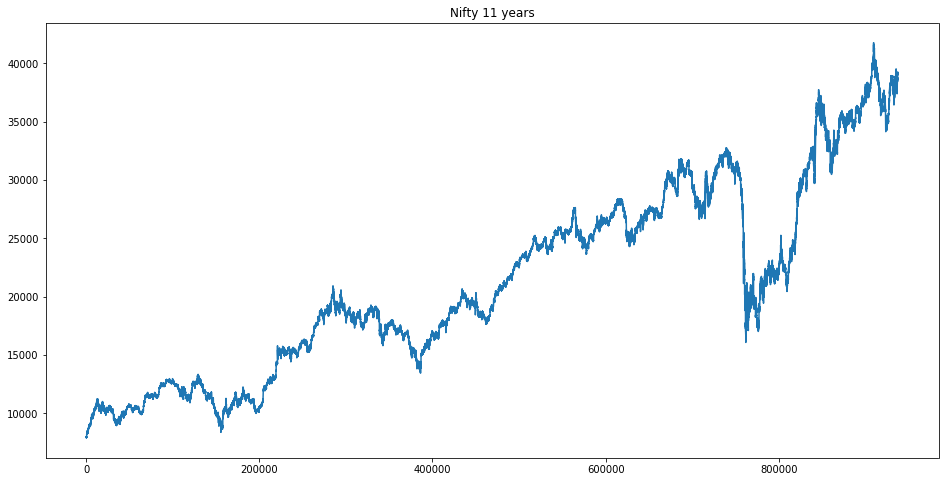

In [10]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_1.close)
plt.show()

In [11]:
training_size= int(0.85*len(df_1_new))
test_size=len(df_1_new)-training_size
train_data,test_data=df_1_new[0:training_size],df_1_new[training_size:len(df_1_new)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [12]:
df11 = train_data['close']
df22 = train_data['volume']

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_5min_15_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_5min_15_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+15 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[9+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [51]:
X_train, y_train = to_supervised(dataset_stacked,15,1)
print(X_train.shape), print(y_train.shape)
print(X_train[0:11])
print(y_train)

(797067, 5, 2)
(797067,)
[[[0.00304958 0.01848377]
  [0.00232837 0.01566898]
  [0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]]

 [[0.00232837 0.01566898]
  [0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]]

 [[0.0032123  0.01238506]
  [0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]]

 [[0.00345337 0.00980484]
  [0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]]

 [[0.0034132  0.01032089]
  [0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]]

 [[0.00401588 0.01726403]
  [0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]
  [0.00366833 0.01243198]]

 [[0.00365829 0.00844436]
  [0.00360605 0.00844436]
  [0.00357391 0.01792081]
  [0.00366833 0.01243198]
  [0.00381498 0.01595046]]

 [[0.00360605 0.00844436]
  [0.00357391 0.01792081]

In [52]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.fit(X_train,y_train,epochs=2,batch_size=64,verbose=1)

Epoch 1/2
12455/12455 [==============================] - 98s 8ms/step - loss: 2.8438e-06
Epoch 2/2
12455/12455 [==============================] - 95s 8ms/step - loss: 2.8740e-06


In [54]:
model.save("BANKNIFY_11year_5min_qty_ltp.hdf5")

In [59]:
df33 = test_data['close']
df44 = test_data['volume']

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_1min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_1min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [61]:
X_test, y_test = to_supervised(dataset_stacked_test,5,1)
print(X_test.shape), print(y_test.shape)

(140650, 5, 2)
(140650,)


(None, None)

In [62]:
model = tf.keras.models.load_model("BANKNIFY_11year_5min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22018.01 ],
       [22018.867],
       [22006.506],
       ...,
       [38982.555],
       [38981.293],
       [38971.977]], dtype=float32)

### Model for 1-10 min

In [64]:
df_10 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_10 = pd.DataFrame(df_10)
df_10.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


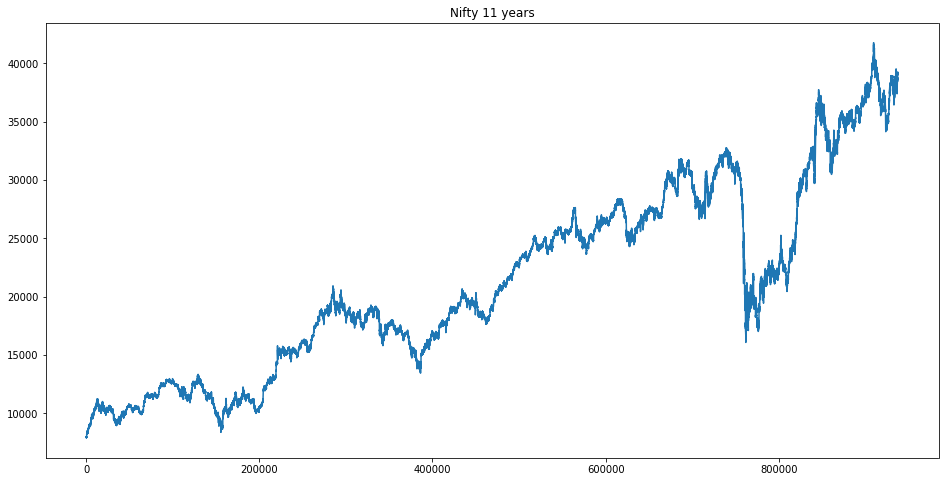

In [65]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_10.close)
plt.show()

In [66]:
training_size= int(0.85*len(df_10))
test_size=len(df_10)-training_size
train_data,test_data=df_10[0:training_size],df_10[training_size:len(df_10)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [67]:
df11 = train_data['close']
df22 = train_data['volume']

In [68]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_10min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_10min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


In [69]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+10 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[19+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [70]:
X_train, y_train = to_supervised(dataset_stacked,10,1)
print(X_train.shape), print(y_train.shape)

(797057, 10, 2)
(797057,)


(None, None)

In [71]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12455/12455 [==============================] - 175s 14ms/step - loss: 1.2775e-04
Epoch 2/10
12455/12455 [==============================] - 181s 15ms/step - loss: 9.6731e-06
Epoch 3/10
12455/12455 [==============================] - 174s 14ms/step - loss: 7.1289e-06
Epoch 4/10
12455/12455 [==============================] - 175s 14ms/step - loss: 6.3734e-06
Epoch 5/10
12455/12455 [==============================] - 174s 14ms/step - loss: 5.9654e-06
Epoch 6/10
12455/12455 [==============================] - 175s 14ms/step - loss: 5.6830e-06
Epoch 7/10
12455/12455 [==============================] - 175s 14ms/step - loss: 5.4985e-06
Epoch 8/10
12455/12455 [==============================] - 175s 14ms/step - loss: 5.3748e-06
Epoch 9/10
12455/12455 [==============================] - 175s 14ms/step - loss: 5.3120e-06
Epoch 10/10
12455/12455 [==============================] - 175s 14ms/step - loss: 5.0945e-06


In [73]:
model.save("BANKNIFY_11year_10min_qty_ltp.hdf5")

In [74]:
df33 = test_data['close']
df44 = test_data['volume']

In [77]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_10min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_10min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [79]:
X_test, y_test = to_supervised(dataset_stacked_test,10,1)
print(X_test.shape), print(y_test.shape)

(140640, 10, 2)
(140640,)


(None, None)

In [80]:
model = tf.keras.models.load_model("BANKNIFY_11year_10min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22015.121],
       [22014.951],
       [21998.768],
       ...,
       [39182.438],
       [39170.02 ],
       [39169.953]], dtype=float32)

### Model for 1-15 min

In [83]:
df_15 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_15 = pd.DataFrame(df_15)
df_15.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


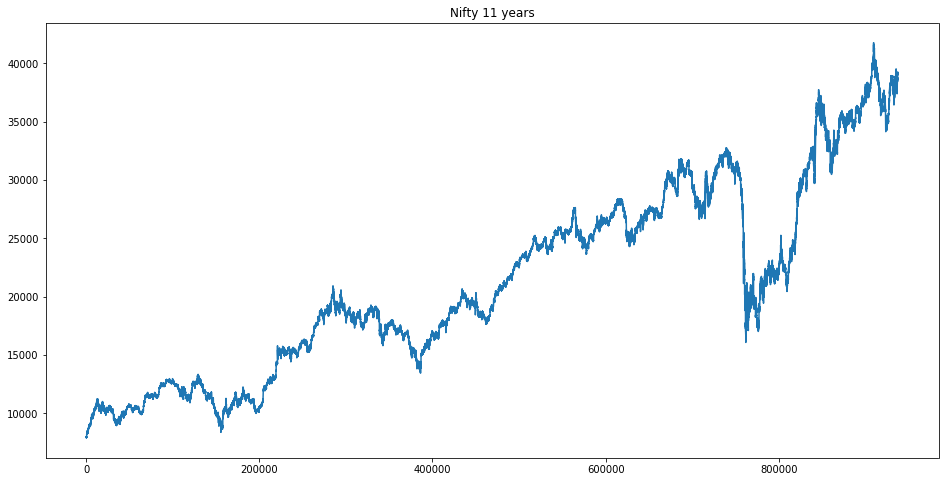

In [84]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_15.close)
plt.show()

In [85]:
training_size= int(0.85*len(df_15))
test_size=len(df_15)-training_size
train_data,test_data=df_15[0:training_size],df_15[training_size:len(df_15)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [86]:
df11 = train_data['close']
df22 = train_data['volume']

In [87]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_15min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_15min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [90]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+15 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[29+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [92]:
X_train, y_train = to_supervised(dataset_stacked,15,1)
print(X_train.shape), print(y_train.shape)

(797047, 15, 2)
(797047,)


(None, None)

In [94]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [95]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12454/12454 [==============================] - 240s 19ms/step - loss: 8.7420e-05
Epoch 2/10
12454/12454 [==============================] - 261s 21ms/step - loss: 1.1093e-05
Epoch 3/10
12454/12454 [==============================] - 280s 23ms/step - loss: 9.1366e-06
Epoch 4/10
12454/12454 [==============================] - 262s 21ms/step - loss: 8.2690e-06
Epoch 5/10
12454/12454 [==============================] - 253s 20ms/step - loss: 7.8811e-06
Epoch 6/10
12454/12454 [==============================] - 253s 20ms/step - loss: 7.6910e-06
Epoch 7/10
12454/12454 [==============================] - 254s 20ms/step - loss: 7.4250e-06
Epoch 8/10
12454/12454 [==============================] - 261s 21ms/step - loss: 7.3332e-06
Epoch 9/10
12454/12454 [==============================] - 249s 20ms/step - loss: 7.1916e-06
Epoch 10/10
12454/12454 [==============================] - 243s 20ms/step - loss: 7.0916e-06


In [96]:
model.save("BANKNIFY_11year_15min_qty_ltp.hdf5")

In [97]:
df33 = test_data['close']
df44 = test_data['volume']

In [98]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_15min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_15min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [99]:
X_test, y_test = to_supervised(dataset_stacked_test,15,1)
print(X_test.shape), print(y_test.shape)

(140630, 15, 2)
(140630,)


(None, None)

In [100]:
model = tf.keras.models.load_model("BANKNIFY_11year_15min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[21988.63 ],
       [21990.848],
       [21990.553],
       ...,
       [38901.477],
       [38891.176],
       [38862.316]], dtype=float32)

### Model for 1-20 min

In [101]:
df_20 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_20 = pd.DataFrame(df_20)
df_20.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


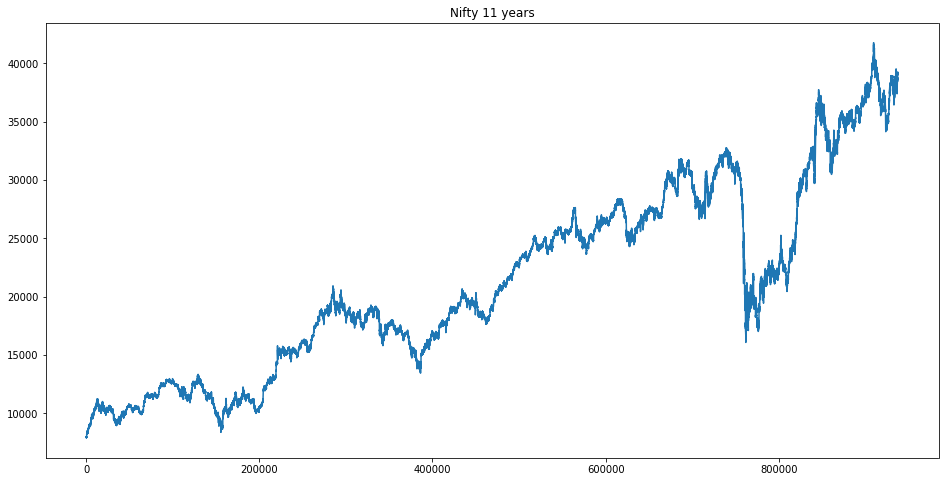

In [102]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_20.close)
plt.show()

In [103]:
training_size= int(0.85*len(df_20))
test_size=len(df_20)-training_size
train_data,test_data=df_20[0:training_size],df_20[training_size:len(df_20)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [104]:
df11 = train_data['close']
df22 = train_data['volume']

In [105]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_20min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_20min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [106]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+20 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[39+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [107]:
X_train, y_train = to_supervised(dataset_stacked,20,1)
print(X_train.shape), print(y_train.shape)

(797037, 20, 2)
(797037,)


(None, None)

In [108]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
model.fit(X_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
12454/12454 [==============================] - 306s 24ms/step - loss: 7.9018e-05
Epoch 2/20
12454/12454 [==============================] - 303s 24ms/step - loss: 1.2596e-05
Epoch 3/20
12454/12454 [==============================] - 302s 24ms/step - loss: 1.1314e-05
Epoch 4/20
12454/12454 [==============================] - 303s 24ms/step - loss: 1.0464e-05
Epoch 5/20
12454/12454 [==============================] - 302s 24ms/step - loss: 9.9941e-06
Epoch 6/20
12454/12454 [==============================] - 303s 24ms/step - loss: 9.8225e-06
Epoch 7/20
12454/12454 [==============================] - 304s 24ms/step - loss: 9.5727e-06
Epoch 8/20
12454/12454 [==============================] - 305s 24ms/step - loss: 9.3510e-06
Epoch 9/20
12454/12454 [==============================] - 303s 24ms/step - loss: 9.1841e-06
Epoch 10/20
12454/12454 [==============================] - 303s 24ms/step - loss: 9.0523e-06
Epoch 11/20
12454/12454 [==============================] - 303s 24ms/step - los

In [110]:
model.save("BANKNIFY_11year_20min_qty_ltp.hdf5")

In [111]:
df33 = test_data['close']
df44 = test_data['volume']

In [112]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_20min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_20min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [113]:
X_test, y_test = to_supervised(dataset_stacked_test,20,1)
print(X_test.shape), print(y_test.shape)

(140620, 20, 2)
(140620,)


(None, None)

In [114]:
model = tf.keras.models.load_model("BANKNIFY_11year_20min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22020.219],
       [22037.33 ],
       [22043.734],
       ...,
       [38941.14 ],
       [38952.26 ],
       [38949.793]], dtype=float32)

### Model for 1-25 min

In [115]:
df_25 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_25 = pd.DataFrame(df_25)
df_25.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


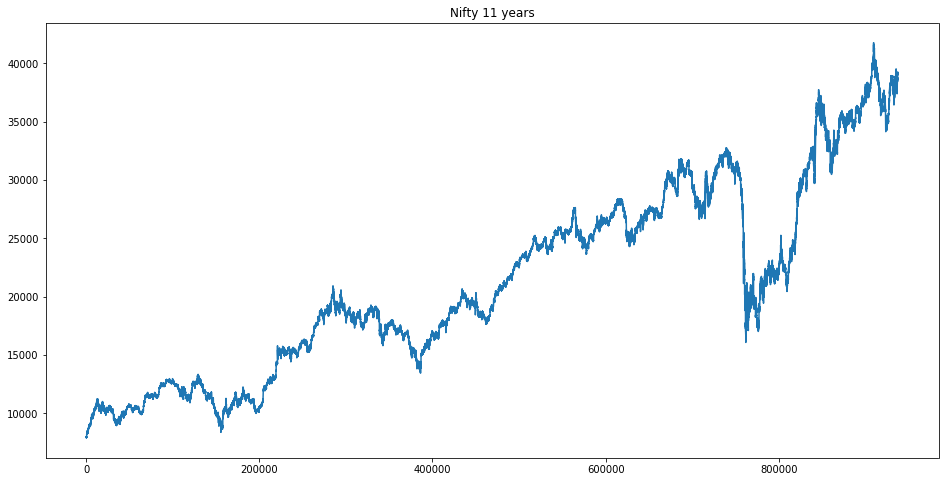

In [116]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_25.close)
plt.show()

In [117]:
training_size= int(0.85*len(df_25))
test_size=len(df_25)-training_size
train_data,test_data=df_25[0:training_size],df_25[training_size:len(df_25)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [118]:
df11 = train_data['close']
df22 = train_data['volume']

In [119]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_25min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_25min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [120]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+25 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[49+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [121]:
X_train, y_train = to_supervised(dataset_stacked,25,1)
print(X_train.shape), print(y_train.shape)

(797027, 25, 2)
(797027,)


(None, None)

In [122]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(25,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [123]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12454/12454 [==============================] - 365s 29ms/step - loss: 7.7779e-05
Epoch 2/10
12454/12454 [==============================] - 363s 29ms/step - loss: 1.4684e-05
Epoch 3/10
12454/12454 [==============================] - 381s 31ms/step - loss: 1.3070e-05
Epoch 4/10
12454/12454 [==============================] - 384s 31ms/step - loss: 1.2270e-05
Epoch 5/10
12454/12454 [==============================] - 385s 31ms/step - loss: 1.1932e-05
Epoch 6/10
12454/12454 [==============================] - 383s 31ms/step - loss: 1.1671e-05
Epoch 7/10
12454/12454 [==============================] - 384s 31ms/step - loss: 1.1476e-05
Epoch 8/10
12454/12454 [==============================] - 378s 30ms/step - loss: 1.1325e-05
Epoch 9/10
12454/12454 [==============================] - 373s 30ms/step - loss: 1.1255e-05
Epoch 10/10
12454/12454 [==============================] - 368s 30ms/step - loss: 1.1067e-05


In [124]:
model.save("BANKNIFY_11year_25min_qty_ltp.hdf5")

In [125]:
df33 = test_data['close']
df44 = test_data['volume']

In [126]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_25min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_25min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [127]:
X_test, y_test = to_supervised(dataset_stacked_test,25,1)
print(X_test.shape), print(y_test.shape)

(140610, 25, 2)
(140610,)


(None, None)

In [128]:
model = tf.keras.models.load_model("BANKNIFY_11year_25min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22065.574],
       [22065.283],
       [22057.215],
       ...,
       [39092.992],
       [39068.246],
       [39062.984]], dtype=float32)

### Model 1-30 min

In [129]:
df_30 = pd.read_csv('BANKNIFTY/appended/data_1.csv')
df_30 = pd.DataFrame(df_30)
df_30.tail()

,Date,Time,close,volume
937734,20220210,15:26:00,39014.00,20875
937735,20220210,15:27:00,39009.30,19925
937736,20220210,15:28:00,39011.25,32075
937737,20220210,15:29:00,39020.00,21200
937738,20220210,15:30:00,39035.00,425


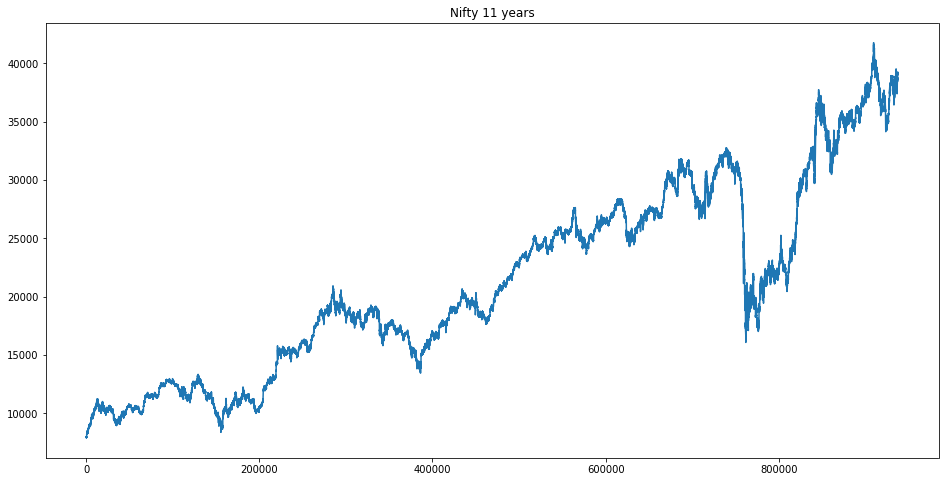

In [130]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_30.close)
plt.show()

In [131]:
training_size= int(0.85*len(df_30))
test_size=len(df_30)-training_size
train_data,test_data=df_30[0:training_size],df_30[training_size:len(df_30)]
print(train_data.shape)
print(test_data.shape)

(797078, 4)
(140661, 4)


In [132]:
df11 = train_data['close']
df22 = train_data['volume']

In [133]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_30min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_30min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(797078, 2)
[[0.00304958 0.01848377]
 [0.00232837 0.01566898]
 [0.0032123  0.01238506]
 ...
 [0.56833021 0.01998499]
 [0.56856324 0.01018015]
 [0.56841056 0.00881967]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [134]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end+30 < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[59+in_start, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [135]:
X_train, y_train = to_supervised(dataset_stacked,30,1)
print(X_train.shape), print(y_train.shape)

(797017, 30, 2)
(797017,)


(None, None)

In [136]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [137]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12454/12454 [==============================] - 432s 35ms/step - loss: 8.9835e-05
Epoch 2/10
12454/12454 [==============================] - 430s 35ms/step - loss: 1.7037e-05
Epoch 3/10
12454/12454 [==============================] - 434s 35ms/step - loss: 1.5199e-05
Epoch 4/10
12454/12454 [==============================] - 436s 35ms/step - loss: 1.4430e-05
Epoch 5/10
12454/12454 [==============================] - 436s 35ms/step - loss: 1.3913e-05
Epoch 6/10
12454/12454 [==============================] - 441s 35ms/step - loss: 1.3594e-05
Epoch 7/10
12454/12454 [==============================] - 441s 35ms/step - loss: 1.3464e-05
Epoch 8/10
12454/12454 [==============================] - 468s 38ms/step - loss: 1.3243e-05
Epoch 9/10
12454/12454 [==============================] - 439s 35ms/step - loss: 1.3054e-05
Epoch 10/10
12454/12454 [==============================] - 436s 35ms/step - loss: 1.2914e-05


In [138]:
model.save("BANKNIFY_11year_30min_qty_ltp.hdf5")

In [139]:
df33 = test_data['close']
df44 = test_data['volume']

In [140]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_30min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_30min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(140661, 2)

In [141]:
X_test, y_test = to_supervised(dataset_stacked_test,30,1)
print(X_test.shape), print(y_test.shape)

(140600, 30, 2)
(140600,)


(None, None)

In [142]:
model = tf.keras.models.load_model("BANKNIFY_11year_30min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22040.168],
       [22038.123],
       [22041.268],
       ...,
       [38999.883],
       [39006.855],
       [39006.38 ]], dtype=float32)

# Training for 5 min

In [88]:
df_5 = pd.read_csv('BANKNIFTY/appended/data_5.csv')
df_5 = pd.DataFrame(df_5)
df_5.tail()

,Date,Time,close,volume
188832,202201031,15:14:00,38144.45,79050
188833,202201031,15:19:00,38157.80,79800
188834,202201031,15:24:00,38091.05,87575
188835,202201031,15:29:00,38085.00,117700
188836,202201031,15:30:00,38088.00,675


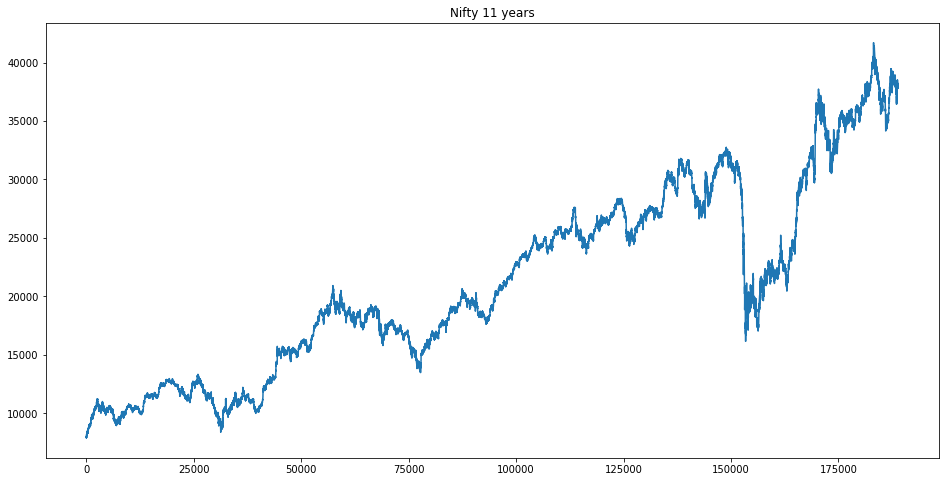

In [89]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_5.close)
plt.show()

In [176]:
training_size= int(0.85*len(df_5))
test_size=len(df_5)-training_size
train_data,test_data=df_5[0:training_size],df_5[training_size:len(df_5)]
print(train_data.shape)
print(test_data.shape)

(160511, 4)
(28326, 4)


In [177]:
df11 = train_data['close']
df22 = train_data['volume']

In [178]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_5min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_5min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(160511, 2)
[[0.00302383 0.02560543]
 [0.00327916 0.02477607]
 [0.0040512  0.02389263]
 ...
 [0.57545192 0.0639721 ]
 [0.57533933 0.07325727]
 [0.57549414 0.04720471]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [134]:
# df_practice = pd.DataFrame({'A':[1,2,3,4,5],'B':[6,7,8,9,10]})
# scaler = MinMaxScaler(feature_range=(0, 1))
# df_practice_scaled = scaler.fit_transform(df_practice)
# df_practice_scaled

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [192]:
# df_practice2 = pd.DataFrame({'A':[6,7,8,9,10],'B':[11,12,13,14,15]})
# df_practice_scaled2 = scaler.transform(df_practice2)
# df_practice_scaled2
df_practice2 = pd.DataFrame({'A':[6],'B':[11]})
practice2 = np.array(df_practice2)
practice2 = np.expand_dims(practice2, axis=0)
practice2

array([[[ 6, 11]]], dtype=int64)

In [94]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [184]:
X_train, y_train = to_supervised(dataset_stacked,5,1)
print(X_train.shape), print(y_train.shape)
X_train

(160505, 5, 2)
(160505, 1)


array([[[3.02382671e-03, 2.56054290e-02],
        [3.27916314e-03, 2.47760742e-02],
        [4.05120400e-03, 2.38926310e-02],
        [3.82803594e-03, 2.27207166e-02],
        [3.71142560e-03, 8.42336040e-03]],

       [[3.27916314e-03, 2.47760742e-02],
        [4.05120400e-03, 2.38926310e-02],
        [3.82803594e-03, 2.27207166e-02],
        [3.71142560e-03, 8.42336040e-03],
        [4.10950917e-03, 1.53827292e-02]],

       [[4.05120400e-03, 2.38926310e-02],
        [3.82803594e-03, 2.27207166e-02],
        [3.71142560e-03, 8.42336040e-03],
        [4.10950917e-03, 1.53827292e-02],
        [3.82803594e-03, 4.67323420e-03]],

       ...,

       [[5.66171341e-01, 6.09972451e-02],
        [5.66249751e-01, 3.60589058e-06],
        [5.76014862e-01, 1.80787094e-01],
        [5.76626061e-01, 9.31617891e-02],
        [5.77267418e-01, 1.00535835e-01]],

       [[5.66249751e-01, 3.60589058e-06],
        [5.76014862e-01, 1.80787094e-01],
        [5.76626061e-01, 9.31617891e-02],
        [5.77

In [96]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
model.fit(X_train,y_train,epochs=40,batch_size=64,verbose=1)

Epoch 1/40
2508/2508 [==============================] - 19s 6ms/step - loss: 7.0957e-04
Epoch 2/40
2508/2508 [==============================] - 19s 7ms/step - loss: 1.0144e-05
Epoch 3/40
2508/2508 [==============================] - 19s 8ms/step - loss: 1.2280e-05
Epoch 4/40
2508/2508 [==============================] - 19s 8ms/step - loss: 1.1300e-05
Epoch 5/40
2508/2508 [==============================] - 19s 8ms/step - loss: 1.0023e-05
Epoch 6/40
2508/2508 [==============================] - 19s 8ms/step - loss: 8.7175e-06
Epoch 7/40
2508/2508 [==============================] - 19s 8ms/step - loss: 7.5166e-06
Epoch 8/40
2508/2508 [==============================] - 20s 8ms/step - loss: 7.0727e-06
Epoch 9/40
2508/2508 [==============================] - 19s 8ms/step - loss: 6.6820e-06
Epoch 10/40
2508/2508 [==============================] - 19s 8ms/step - loss: 5.8008e-06
Epoch 11/40
2508/2508 [==============================] - 20s 8ms/step - loss: 5.4107e-06
Epoch 12/40
2508/2508 [=======

In [106]:
model.save("BANKNIFY_11year_5min_qty_ltp.hdf5")

In [180]:
df33 = test_data['close']
df44 = test_data['volume']

In [181]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_5min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_5min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(28326, 2)

In [182]:
X_test, y_test = to_supervised(dataset_stacked_test,5,1)
print(X_test.shape), print(y_test.shape)

(28320, 5, 2)
(28320, 1)


(None, None)

In [183]:
model = tf.keras.models.load_model("BANKNIFY_11year_5min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22169.434],
       [22159.76 ],
       [22169.965],
       ...,
       [38139.434],
       [38148.465],
       [38080.17 ]], dtype=float32)

# Training for 10 min

In [213]:
df_10 = pd.read_csv('BANKNIFTY/appended/data_10.csv')
df_10 = pd.DataFrame(df_10)
df_10.tail()

,Date,Time,close,volume
94858,202201031,14:54:00,38115.00,74050
94859,202201031,15:04:00,38032.05,100575
94860,202201031,15:14:00,38144.45,124900
94861,202201031,15:24:00,38091.05,167375
94862,202201031,15:30:00,38088.00,118375


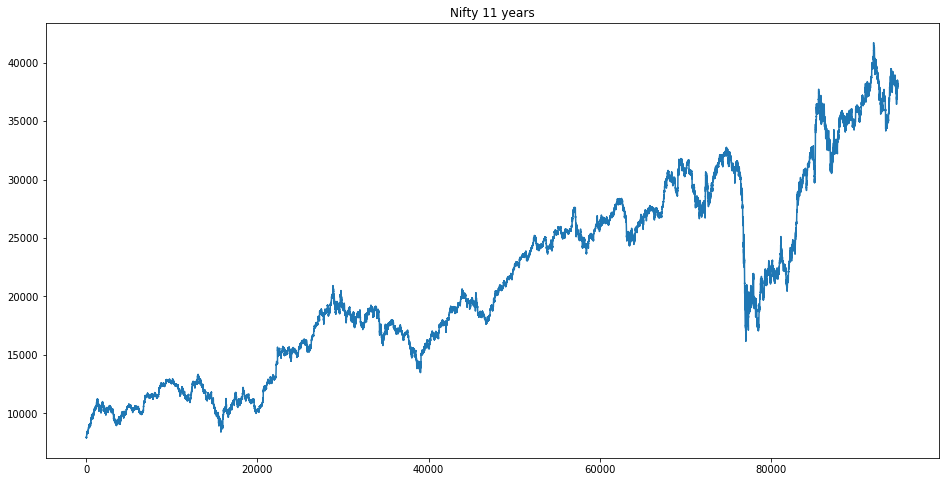

In [214]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_10.close)
plt.show()

In [215]:
training_size= int(0.85*len(df_10))
test_size=len(df_10)-training_size
train_data,test_data=df_10[0:training_size],df_10[training_size:len(df_10)]
print(train_data.shape)
print(test_data.shape)

(80633, 4)
(14230, 4)


In [216]:
df11 = train_data['close']
df22 = train_data['volume']

In [217]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_10min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_10min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(80633, 2)
[[0.00317933 0.04883094]
 [0.00372833 0.0451798 ]
 [0.00400986 0.02308079]
 ...
 [0.56821591 0.05328568]
 [0.56865631 0.0357637 ]
 [0.56720038 0.06869384]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [198]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [199]:
X_train, y_train = to_supervised(dataset_stacked,10,1)
print(X_train.shape), print(y_train.shape)
X_train

(80622, 10, 2)
(80622, 1)


array([[[0.00317933, 0.04883094],
        [0.00372833, 0.0451798 ],
        [0.00400986, 0.02308079],
        ...,
        [0.00119451, 0.01583092],
        [0.0015766 , 0.00933224],
        [0.00232467, 0.01237195]],

       [[0.00372833, 0.0451798 ],
        [0.00400986, 0.02308079],
        [0.00219999, 0.03326555],
        ...,
        [0.0015766 , 0.00933224],
        [0.00232467, 0.01237195],
        [0.00159671, 0.02669699]],

       [[0.00400986, 0.02308079],
        [0.00219999, 0.03326555],
        [0.00151627, 0.0311692 ],
        ...,
        [0.00232467, 0.01237195],
        [0.00159671, 0.02669699],
        [0.0020351 , 0.00755035]],

       ...,

       [[0.56945467, 0.0855345 ],
        [0.56753219, 0.14528042],
        [0.56720842, 0.07840692],
        ...,
        [0.56830842, 0.0610771 ],
        [0.56915302, 0.05225497],
        [0.56880915, 0.04371235]],

       [[0.56753219, 0.14528042],
        [0.56720842, 0.07840692],
        [0.56760257, 0.15874946],
        .

In [200]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [201]:
model.fit(X_train,y_train,epochs=40,batch_size=64,verbose=1)

Epoch 1/40
1260/1260 [==============================] - 15s 10ms/step - loss: 6.4988e-04
Epoch 2/40
1260/1260 [==============================] - 16s 13ms/step - loss: 1.8770e-05
Epoch 3/40
1260/1260 [==============================] - 19s 15ms/step - loss: 2.3782e-05
Epoch 4/40
1260/1260 [==============================] - 19s 15ms/step - loss: 2.3372e-05
Epoch 5/40
1260/1260 [==============================] - 19s 15ms/step - loss: 2.2259e-05
Epoch 6/40
1260/1260 [==============================] - 20s 16ms/step - loss: 1.7972e-05
Epoch 7/40
1260/1260 [==============================] - 17s 14ms/step - loss: 1.6594e-05
Epoch 8/40
1260/1260 [==============================] - 18s 15ms/step - loss: 1.5457e-05
Epoch 9/40
1260/1260 [==============================] - 18s 14ms/step - loss: 1.3449e-05
Epoch 10/40
1260/1260 [==============================] - 19s 15ms/step - loss: 1.0471e-05
Epoch 11/40
1260/1260 [==============================] - 18s 15ms/step - loss: 1.0788e-05
Epoch 12/40
1260/12

In [202]:
model.save("BANKNIFY_11year_10min_qty_ltp.hdf5")

In [203]:
df33 = test_data['close']
df44 = test_data['volume']

In [204]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_10min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_10min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(14230, 2)

In [232]:
X_test, y_test = to_supervised(dataset_stacked_test,10,1)
print(X_test.shape), print(y_test.shape)

(14219, 10, 2)
(14219, 1)


(None, None)

In [233]:
model = tf.keras.models.load_model("BANKNIFY_11year_10min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[21947.602],
       [21923.283],
       [21800.46 ],
       ...,
       [37970.02 ],
       [37883.895],
       [38005.242]], dtype=float32)

# Training for 15 min

In [234]:
df_15 = pd.read_csv('BANKNIFTY/appended/data_15.csv')
df_15 = pd.DataFrame(df_15)
df_15.tail()

,Date,Time,close,volume
64014,202201031,14:44:00,38130.10,117500
64015,202201031,14:59:00,38109.65,119025
64016,202201031,15:14:00,38144.45,180500
64017,202201031,15:29:00,38085.00,285075
64018,202201031,15:30:00,38088.00,675


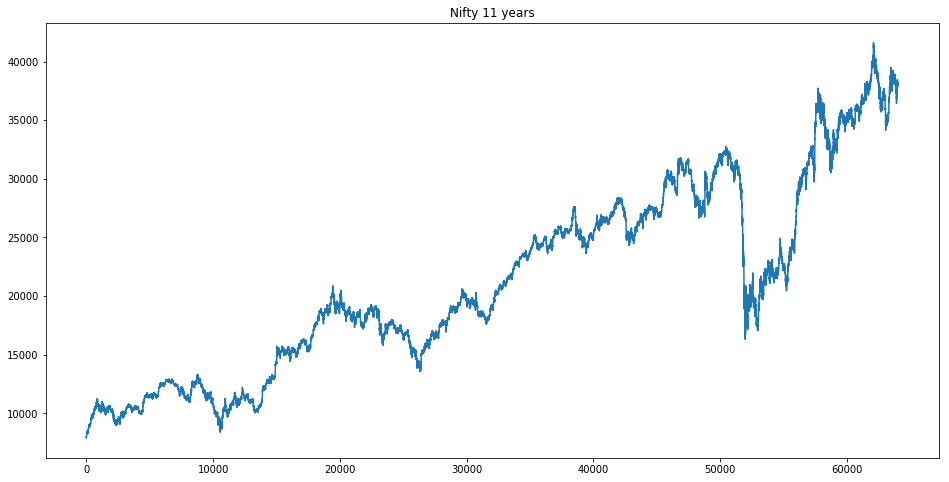

In [235]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_15.close)
plt.show()

In [236]:
training_size= int(0.85*len(df_15))
test_size=len(df_15)-training_size
train_data,test_data=df_15[0:training_size],df_15[training_size:len(df_15)]
print(train_data.shape)
print(test_data.shape)

(54416, 4)
(9603, 4)


In [237]:
df11 = train_data['close']
df22 = train_data['volume']

In [238]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_15min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_15min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(54416, 2)
[[0.00395266 0.05034843]
 [0.004011   0.03154657]
 [0.00154285 0.0362623 ]
 ...
 [0.57301165 0.0781053 ]
 [0.57472749 0.06779421]
 [0.5760209  0.11303351]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [239]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [240]:
X_train, y_train = to_supervised(dataset_stacked,15,1)
print(X_train.shape), print(y_train.shape)
X_train

(54400, 15, 2)
(54400, 1)


array([[[3.95266458e-03, 5.03484269e-02],
        [4.01099907e-03, 3.15465661e-02],
        [1.54284668e-03, 3.62623025e-02],
        ...,
        [4.70698988e-04, 1.95861880e-02],
        [9.55478715e-04, 1.44062082e-02],
        [1.86670368e-03, 1.75703940e-02]],

       [[4.01099907e-03, 3.15465661e-02],
        [1.54284668e-03, 3.62623025e-02],
        [1.51267367e-03, 2.69041313e-02],
        ...,
        [9.55478715e-04, 1.44062082e-02],
        [1.86670368e-03, 1.75703940e-02],
        [2.54459068e-03, 3.45763656e-02]],

       [[1.54284668e-03, 3.62623025e-02],
        [1.51267367e-03, 2.69041313e-02],
        [1.71785015e-03, 2.45951308e-02],
        ...,
        [1.86670368e-03, 1.75703940e-02],
        [2.54459068e-03, 3.45763656e-02],
        [1.75808084e-03, 2.59756443e-02]],

       ...,

       [[5.73959081e-01, 7.07262723e-02],
        [5.74200465e-01, 5.57360947e-02],
        [5.73100156e-01, 8.58874869e-02],
        ...,
        [5.75274625e-01, 2.03512124e-01],
     

In [241]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(15,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [242]:
model.fit(X_train,y_train,epochs=40,batch_size=64,verbose=1)

Epoch 1/40
850/850 [==============================] - 17s 18ms/step - loss: 0.0012
Epoch 2/40
850/850 [==============================] - 17s 20ms/step - loss: 2.7554e-05
Epoch 3/40
850/850 [==============================] - 17s 20ms/step - loss: 3.0032e-05
Epoch 4/40
850/850 [==============================] - 16s 19ms/step - loss: 2.9758e-05
Epoch 5/40
850/850 [==============================] - 18s 21ms/step - loss: 3.1136e-05
Epoch 6/40
850/850 [==============================] - 17s 20ms/step - loss: 2.9877e-05
Epoch 7/40
850/850 [==============================] - 18s 22ms/step - loss: 2.4142e-05
Epoch 8/40
850/850 [==============================] - 17s 20ms/step - loss: 2.0421e-05
Epoch 9/40
850/850 [==============================] - 18s 21ms/step - loss: 1.9407e-05
Epoch 10/40
850/850 [==============================] - 16s 19ms/step - loss: 1.6553e-05
Epoch 11/40
850/850 [==============================] - 17s 20ms/step - loss: 1.4520e-05
Epoch 12/40
850/850 [========================

In [243]:
model.save("BANKNIFY_11year_15min_qty_ltp.hdf5")

In [244]:
df33 = test_data['close']
df44 = test_data['volume']

In [245]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_15min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_15min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(9603, 2)

In [246]:
X_test, y_test = to_supervised(dataset_stacked_test,15,1)
print(X_test.shape), print(y_test.shape)

(9587, 15, 2)
(9587, 1)


(None, None)

In [247]:
model = tf.keras.models.load_model("BANKNIFY_11year_15min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[22289.24 ],
       [22295.795],
       [22261.408],
       ...,
       [38039.73 ],
       [38023.48 ],
       [38067.203]], dtype=float32)

# Training for 20 min

In [248]:
df_20 = pd.read_csv('BANKNIFTY/appended/data_20.csv')
df_20 = pd.DataFrame(df_20)
df_20.tail()

,Date,Time,close,volume
47432,202201031,14:14:00,38146.10,149950
47433,202201031,14:34:00,38170.00,150275
47434,202201031,14:54:00,38115.00,151575
47435,202201031,15:14:00,38144.45,225475
47436,202201031,15:30:00,38088.00,285750


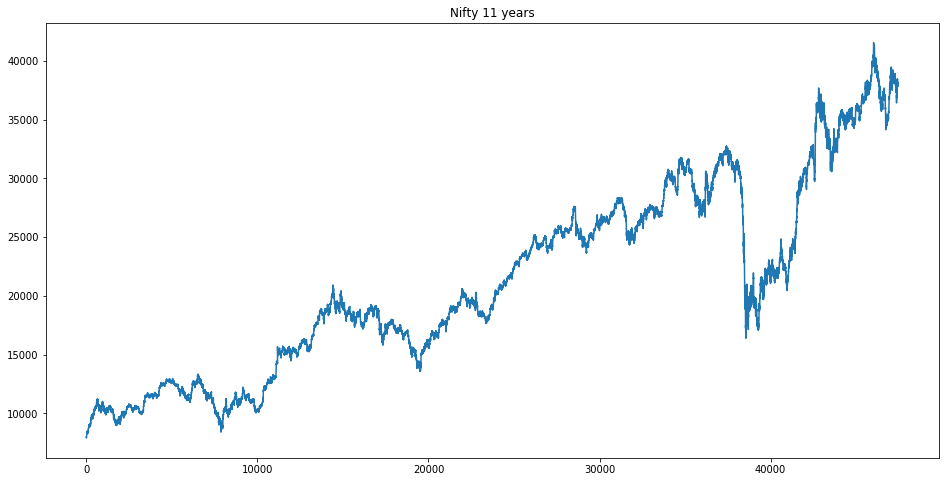

In [249]:
plt.figure(figsize = (16,8))
plt.title('Nifty 11 years')
plt.plot(df_20.close)
plt.show()

In [250]:
training_size= int(0.85*len(df_20))
test_size=len(df_20)-training_size
train_data,test_data=df_20[0:training_size],df_20[training_size:len(df_20)]
print(train_data.shape)
print(test_data.shape)

(40321, 4)
(7116, 4)


In [251]:
df11 = train_data['close']
df22 = train_data['volume']

In [252]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler1.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
pickle.dump(scaler, open("Train_15min_scale_ltp.pkl", 'wb'))
pickle.dump(scaler1, open("Train_15min_scale_ltq.pkl", 'wb'))
print(dataset_stacked.shape)
print(dataset_stacked)


(40321, 2)
[[0.00372872 0.06459038]
 [0.00220023 0.03871678]
 [0.00151241 0.03919681]
 ...
 [0.56886978 0.06593446]
 [0.56827648 0.06579045]
 [0.56726084 0.07176682]]


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [253]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [254]:
X_train, y_train = to_supervised(dataset_stacked,20,1)
print(X_train.shape), print(y_train.shape)
X_train

(40300, 20, 2)
(40300, 1)


array([[[0.00372872, 0.06459038],
        [0.00220023, 0.03871678],
        [0.00151241, 0.03919681],
        ...,
        [0.00433208, 0.04273703],
        [0.00489521, 0.05227762],
        [0.01071355, 0.11606155]],

       [[0.00220023, 0.03871678],
        [0.00151241, 0.03919681],
        [0.00119464, 0.02978823],
        ...,
        [0.00489521, 0.05227762],
        [0.01071355, 0.11606155],
        [0.01181366, 0.04752533]],

       [[0.00151241, 0.03919681],
        [0.00119464, 0.02978823],
        [0.00232492, 0.01491932],
        ...,
        [0.01071355, 0.11606155],
        [0.01181366, 0.04752533],
        [0.01177545, 0.03823676]],

       ...,

       [[0.55059018, 0.13856294],
        [0.55004515, 0.10263272],
        [0.55318259, 0.15229178],
        ...,
        [0.56759268, 0.15856817],
        [0.56766307, 0.16292444],
        [0.56814575, 0.09815645]],

       [[0.55004515, 0.10263272],
        [0.55318259, 0.15229178],
        [0.55315644, 0.1200818 ],
        .

In [255]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [256]:
model.fit(X_train,y_train,epochs=40,batch_size=64,verbose=1)

Epoch 1/40
630/630 [==============================] - 14s 19ms/step - loss: 8.8778e-04
Epoch 2/40
630/630 [==============================] - 15s 25ms/step - loss: 3.8440e-05
Epoch 3/40
630/630 [==============================] - 17s 27ms/step - loss: 3.8856e-05
Epoch 4/40
630/630 [==============================] - 15s 24ms/step - loss: 4.3121e-05
Epoch 5/40
630/630 [==============================] - 16s 25ms/step - loss: 4.0500e-05
Epoch 6/40
630/630 [==============================] - 15s 23ms/step - loss: 3.4671e-05
Epoch 7/40
630/630 [==============================] - 15s 23ms/step - loss: 3.2727e-05
Epoch 8/40
630/630 [==============================] - 15s 23ms/step - loss: 2.8683e-05
Epoch 9/40
630/630 [==============================] - 15s 23ms/step - loss: 2.5612e-05
Epoch 10/40
630/630 [==============================] - 15s 24ms/step - loss: 2.7440e-05
Epoch 11/40
630/630 [==============================] - 15s 23ms/step - loss: 1.9105e-05
Epoch 12/40
630/630 [====================

In [257]:
model.save("BANKNIFY_11year_20min_qty_ltp.hdf5")

In [258]:
df33 = test_data['close']
df44 = test_data['volume']

In [259]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = pickle.load(open("Train_20min_scale_ltp.pkl", 'rb'))
scaler1 = pickle.load(open("Train_20min_scale_ltq.pkl", 'rb'))

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

df33_scaled = scaler.transform(df33)
df44_scaled = scaler1.transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Train_20min_scale_ltp.pkl'

In [ ]:
X_test, y_test = to_supervised(dataset_stacked_test,15,1)
print(X_test.shape), print(y_test.shape)

In [ ]:
model = tf.keras.models.load_model("BANKNIFY_11year_20min_qty_ltp.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler.inverse_transform(test_predict)
test_predict